In [285]:
import pandas as pd
import numpy as np

In [286]:
data = pd.read_csv('/Users/admin/Desktop/Учеба/Docs/athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [287]:
data.dropna(inplace=True)

In [288]:
ds = data[['height', 'weight', 'sport']]

In [289]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  10858 non-null  float64
 1   weight  10858 non-null  float64
 2   sport   10858 non-null  object 
dtypes: float64(2), object(1)
memory usage: 339.3+ KB


In [290]:
X = pd.get_dummies (ds, drop_first=True) #Преобразуем текставые данные в бинарный формат

In [291]:
X

,height,weight,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1.64,58.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11534,1.73,63.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11535,1.85,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11536,1.60,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [292]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

In [293]:
Y = data['sex'] # Записываем целевое значение в отдельную переменную

In [294]:
Y = pd.get_dummies (Y, drop_first=True) # Преобразуем в бинарный формат


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 22) #Разделяем выборку на тренировочную и тестовую 

In [296]:
model.fit(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [297]:
predictions = model.predict_proba(X_test)
predictions[:2]

array([[0.74815996, 0.25184004],
       [0.112457  , 0.887543  ]])

In [298]:
model.score(X_train, y_train)

0.8102631578947368

In [299]:
model.score(X_test, y_test)

0.8124616329036218

In [300]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative


for predicted_prob, actual in zip(predictions[:, 1], y_test.iloc[:, 0].values):
    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [301]:
tp, fp, fn, tn

(1438, 286, 325, 1209)

In [302]:
from sklearn.metrics import roc_curve

In [303]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [304]:
for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, 1.9999880403253487)
(0.0, 0.0005672149744753262, 0.9999880403253487)
(0.0, 0.003403289846851957, 0.9998618315582788)
(0.0006688963210702341, 0.003403289846851957, 0.9998217068816682)
(0.0006688963210702341, 0.009075439591605219, 0.9995542177644288)
(0.0013377926421404682, 0.009075439591605219, 0.9995319329885001)
(0.0013377926421404682, 0.010777084515031198, 0.9994552035896799)
(0.002006688963210702, 0.010777084515031198, 0.9994362716936009)
(0.002006688963210702, 0.013613159387407828, 0.999379163433369)
(0.0026755852842809363, 0.013613159387407828, 0.9993438710015609)


In [305]:
import matplotlib.pyplot as plt

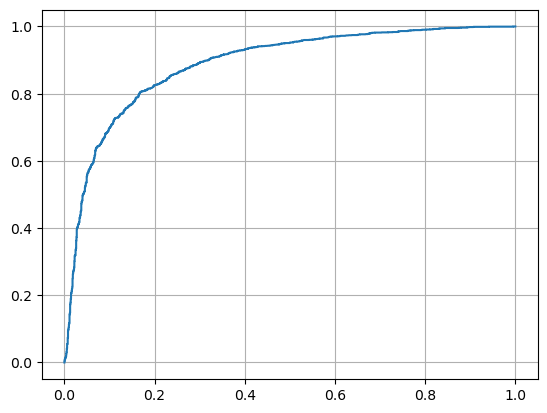

In [306]:
plt.plot(fpr, tpr)
plt.grid()

In [323]:
precicion = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
precicion, recall

(0.834106728538283, 0.815655133295519)

In [325]:
def manual_roc_curve(y_test, predicted_probs):
    # Списки для хранения значений TPR, FPR и порогов
    tpr_list = []
    fpr_list = []
    thresholds = []

    # Получить отсортированный список уникальных пороговых значений и их индексов
    sorted_probs_with_indices = sorted([(prob, idx) for idx, prob in enumerate(predicted_probs)], reverse=True)

    for prob, _ in sorted_probs_with_indices:
        # Используем пороговое значение равное текущей вероятности
        thresholds.append(prob)
        predictions = [1 if p >= prob else 0 for p in predicted_probs]

        # Вычисляем TP, FP, FN и TN
        TP = sum(y_t == 1 and p == 1 for y_t, p in zip(y_test, predictions))
        FP = sum(y_t == 0 and p == 1 for y_t, p in zip(y_test, predictions))
        FN = sum(y_t == 1 and p == 0 for y_t, p in zip(y_test, predictions))
        TN = sum(y_t == 0 and p == 0 for y_t, p in zip(y_test, predictions))

    

        # Вычисляем TPR и FPR и добавляем в списки
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0

        tpr_list.append(TPR)
        fpr_list.append(FPR)
   
   

    return fpr_list, tpr_list, thresholds


In [326]:
fpr2, tpr2, thresholds2 = manual_roc_curve(y_test.iloc[:, 0], predictions[:, 1])

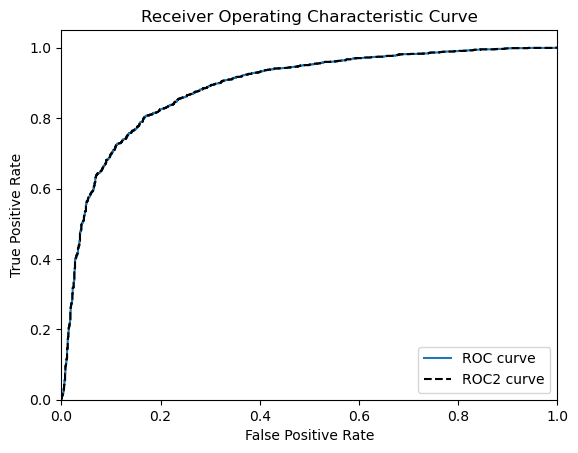

In [327]:

# Создаем график
plt.figure()

# Рисуем ROC-кривую полученные с помощью библиотеки
plt.plot(fpr, tpr, label='ROC curve')

# Рисуем ROC-кривую полученные в ручном режиме
plt.plot(fpr2, tpr2, 'k--', label='ROC2 curve')

# Задаем пределы осей
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Добавляем подписи осей и легенду
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

# Показываем график
plt.show()


Вывод: Что в ручную, что использую библиотеки, результат одинаков)

In [ ]:
def manual_pr_curve(y_test, predicted_probs):
    precision_list = []
    recall_list = []
    thresholds = []

    sorted_probs_with_indices = sorted([(prob, idx) for idx, prob in enumerate(predicted_probs)], reverse=True)

    for prob, _ in sorted_probs_with_indices:
        thresholds.append(prob)
        predictions = [1 if p >= prob else 0 for p in predicted_probs]

        TP = sum(y_t == 1 and p == 1 for y_t, p in zip(y_test, predictions))
        FP = sum(y_t == 0 and p == 1 for y_t, p in zip(y_test, predictions))
        FN = sum(y_t == 1 and p == 0 for y_t, p in zip(y_test, predictions))

        # Вычисляем precision и recall и добавляем в списки
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + FN != 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    return precision_list, recall_list, thresholds


In [328]:
precision, recall, thresholds3 = manual_roc_curve(y_test.iloc[:, 0], predictions[:, 1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


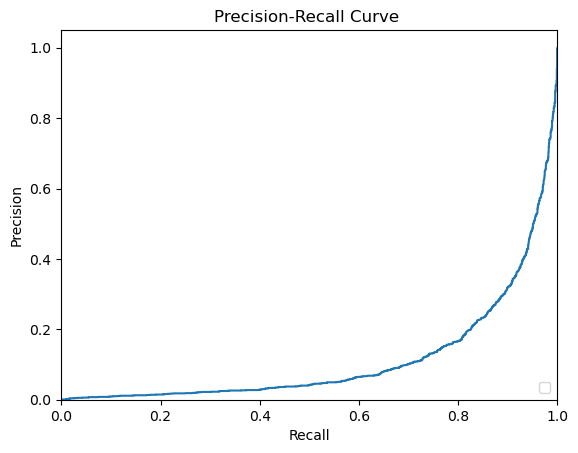

In [333]:
# Создаем график
plt.figure()

# Рисуем Precision-Recall-кривую 
plt.plot(recall, precision)



# Задаем пределы осей
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Добавляем подписи осей и легенду
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve ')
plt.legend(loc="lower right")

# Показываем график
plt.show()

Выводы: модель отлично обучилась, на тестовых данных проявила себя не много лучше чем на тренировочных
График ROC-кривая по форме стремится к идеальной, что показывает высокое качество работы модели.
ROC-кривая построенная с помощью специальной библиотеки и построенная из посчитанных в ручную данных, полностью совпала (хотя я и не понял, почему на одних и тех же данных, этого могло не получиться)
